<a href="https://colab.research.google.com/github/j88620714/DataScience/blob/master/HW1/%E6%A8%99%E8%A8%98%E9%A1%AF%E8%91%97%E9%80%9F%E5%BA%A6%E5%B7%AE%E7%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gspread
!pip install oauth2client
!pip install Pillow
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 18.6MB/s 


In [38]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1_7FyladR7eGnmUjsCvNF1XnpVZpuNGXm' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  #fname = os.path.join(local_download_path, f['title'])
  fname = os.path.join('/content', f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
!ls "/root/data"

title: Untitled0.ipynb, id: 1AM9X_LwPT7wA4lDu42OQ-tbc23q_vedD
downloading to /content/Untitled0.ipynb
title: 復興南路2.ipynb, id: 1QyxaBmyotcR5YhBxm7rtT7xlnma5byNr
downloading to /content/復興南路2.ipynb
title: NotoSansCJKtc-Regular.otf, id: 1fY1VCoDLMTrMyEQLrXghet2ZJjKX3iZv
downloading to /content/NotoSansCJKtc-Regular.otf


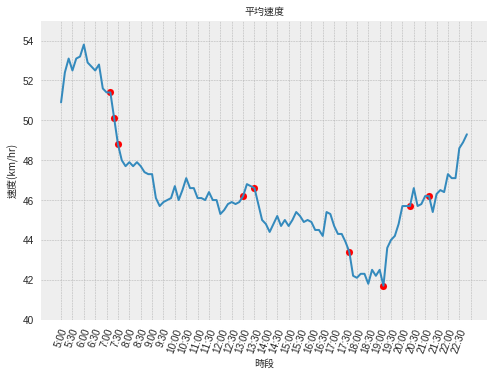

In [43]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from oauth2client.client import GoogleCredentials
from google.colab import auth
from google.colab import files
auth.authenticate_user()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import Image

def plot1(road):
    gc = gspread.authorize(GoogleCredentials.get_application_default())
    sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FJPf9S2vpimDZvefrpnfq31cq3JpmySHse74WQoEgu4/edit?ts=5c8895e5#gid=618695640')
    wks4 = sh.worksheet("復興南北路")

    time = wks4.col_values(3)
    cell = wks4.find(road)
    speed = wks4.col_values(cell.col)
    mark = wks4.col_values(12)

    

    plt.style.use('bmh')
    fig = plt.figure()
    ax = plt.axes()
    stnum=[]
    x = []
    y = []
    for i in range(33,141):
        stnum.append(eval(speed[i].strip('Km/hr')))
        if(mark[i] == "上升" or mark[i] == "下降"):
            y.append(stnum[i-33])
            x.append(i-33) 
    plt.plot(stnum)
    plt.scatter(x,y,color='r',lw=0.1)
    timex=[]
    for j in range(33,141,3):
        a = time[j].split('~')
        timex.append(a[0])
    plt.xticks(range(0,141-33+1,3),timex, rotation=70)
    plt.ylim(40, 55)
    fontPath = 'NotoSansCJKtc-Regular.otf'
    font30 = fm.FontProperties(fname=fontPath, size=10)
    plt.title("平均速度",fontproperties=font30)
    plt.ylabel("速度(km/hr)",fontproperties=font30)
    plt.xlabel("時段",fontproperties=font30)

    fig.savefig(road+'.png')
    files.download(road+'.png')
    plt.show()

    return 

#n=input('請輸入想調查的站點:')
plot1("整體平均")


